In [ ]:
#Build a machine learning model to predict the
#aggregate rating of a restaurant based on other features.


In [ ]:
#libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file=('/content/drive/MyDrive/data_cognifyz/Dataset .csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_cognifyz/Dataset .csv')

In [ ]:
#data vizualization:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

1)handling missing values

In [ ]:
#checking for missing values :
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
#here we have very less no of missing values compared to the size of dataset,therefore directly ignoring the null values
#will not affect the distribution of ratings much,
df= df.dropna()

In [ ]:
#checking if missing values removed or not:
df.isnull().sum().sum()

0

2)preprocessing dataset to customize it into info as per our relevance

In [ ]:
#finding the dtypes
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [ ]:
#dropping columns that are subjective or non-categorial and don't contribute to aggregate rating and are hindrance to encoding: irelevant
#to shorten dataset for ease of implementation and for faster processing
columns_to_drop = ['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Currency']

In [ ]:
df1 = df.drop(columns=columns_to_drop, axis=1 , inplace=True )

In [ ]:
df_1 = pd.DataFrame(df)

In [ ]:
df_1.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df_1.dtypes

Average Cost for two      int64
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

# 3)Encoding categorial variables in processed dataset for downstream tasks

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorial_cols=['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text']

In [ ]:
label_encoder = {}
for col in categorial_cols:
  label_encoder[col] = LabelEncoder()
  df_1[col]=label_encoder[col].fit_transform(df_1[col])

In [ ]:
df_1.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229


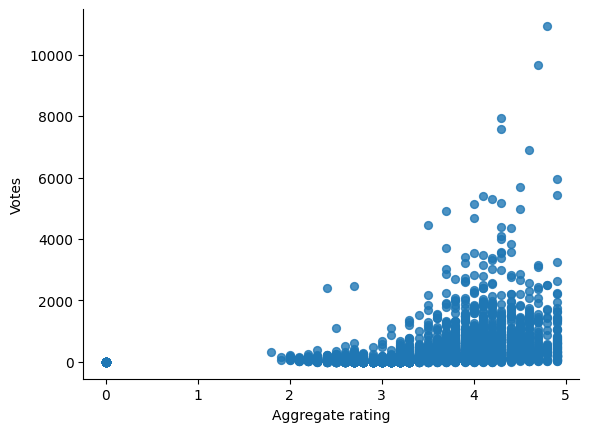

In [ ]:
# @title Aggregate rating vs votes
from matplotlib import pyplot as plt
df_1.plot(kind='scatter', x='Aggregate rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


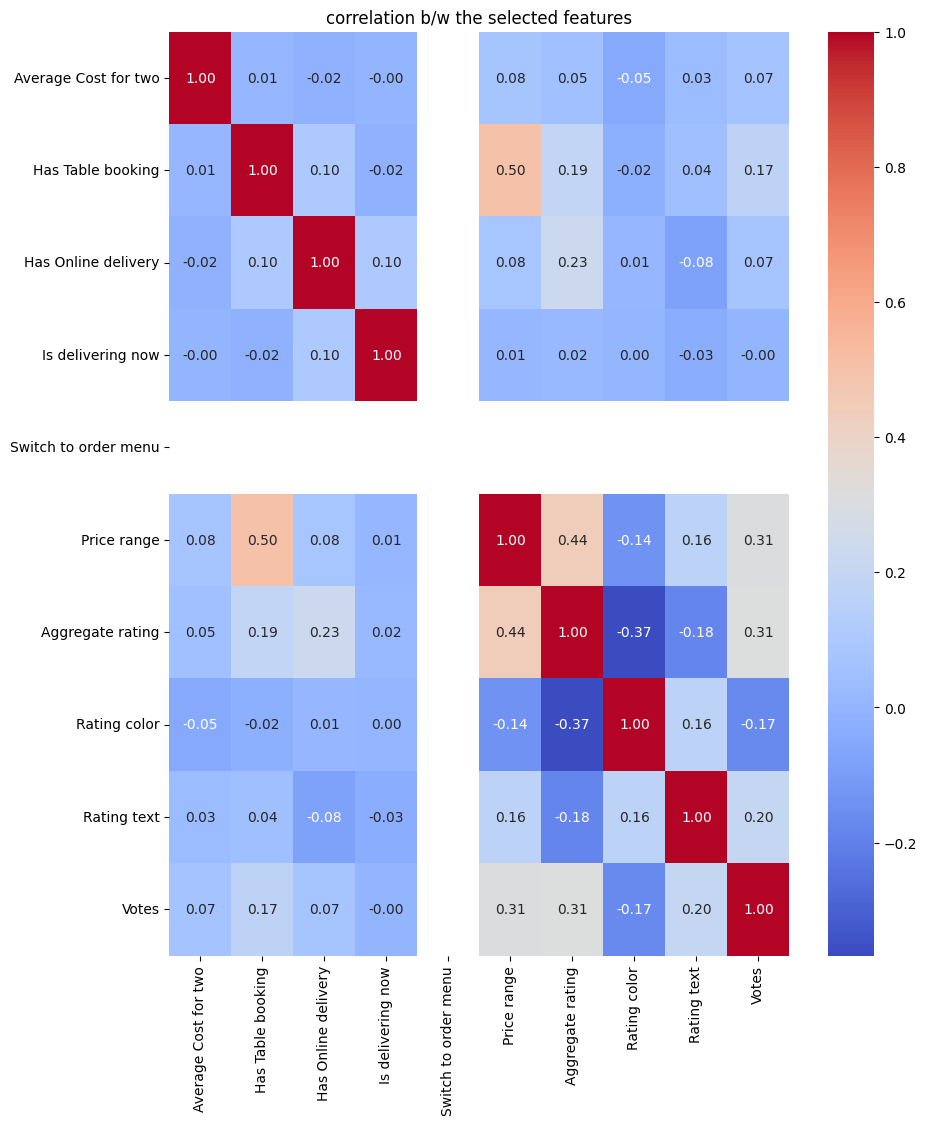

In [ ]:
#checking the correlation (strength and direction of relationship ) b/w selected indp variables
import seaborn as sns
corr_matrix = df_1.corr()
plt.figure(figsize = (10,12))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('correlation b/w the selected features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_1.drop(['Aggregate rating'],axis=1)
y = df_1['Aggregate rating']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=200)

In [ ]:
y_train.head()

2425    4.3
4323    3.3
6283    3.0
3961    0.0
6883    0.0
Name: Aggregate rating, dtype: float64

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9542 non-null   int64  
 1   Has Table booking     9542 non-null   int64  
 2   Has Online delivery   9542 non-null   int64  
 3   Is delivering now     9542 non-null   int64  
 4   Switch to order menu  9542 non-null   int64  
 5   Price range           9542 non-null   int64  
 6   Aggregate rating      9542 non-null   float64
 7   Rating color          9542 non-null   int64  
 8   Rating text           9542 non-null   int64  
 9   Votes                 9542 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 820.0 KB


In [ ]:
print("traning set size : ",len(X_train))
print("length of tsting set : ",len(X_test))

traning set size :  7633
length of tsting set :  1909


# -> Selecting and training **Regression** Model

# 1)Linear Regression model (LR)

In [ ]:
#selecting model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)


LinearRegression()

# **Testing Model**

In [ ]:
y_pred = linear_model.predict(X_test)

# **EVALUATING MODEL'S PERFORMANCE : **

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#mae
mae = mean_absolute_error(y_test,y_pred)
print("mae for LR model : ", mae)
mse = mean_squared_error(y_test,y_pred)
print("mse for LR model : ", mse)
r2_score = r2_score(y_test,y_pred)
print("r2_score for LR model : ", r2_score)



mae for LR model :  0.9697100828541665
mse for LR model :  1.339306923306387
r2_score for LR model :  0.43190364123565905


# **2)Trying Decision tree regression algo : **

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=250)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#intializing model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_DT = DT_model.predict(X_test)

EVALUATING PERFORMANCE:

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_DT = mean_absolute_error(y_test,y_pred_DT)
print("mae for LR model : ", mae_DT)
mse_DT = mean_squared_error(y_test,y_pred_DT)
print("mse for LR model : ", mse_DT)
r2_score_DT = r2_score(y_test,y_pred_DT)
print("r2_score for LR model : ", r2_score_DT)


mae for LR model :  0.14523065024239296
mse for LR model :  0.05133639841599402
r2_score for LR model :  0.9780167363046979


# Conclusion : Decision tree model is a good model  with r2 _score reaching 0.978

# Feature importance : Analysis

In [ ]:
feature_importances = pd.DataFrame(DT_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

In [ ]:
feature_importances.describe()

,Importance
count,9.000000
mean,0.111111
std,0.299570
min,0.000000
25%,0.000072
50%,0.000423
75%,0.002731
max,0.906054


In [ ]:
feature_importances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Votes to Rating text
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Importance  9 non-null      float64
dtypes: float64(1)
memory usage: 444.0+ bytes


In [ ]:
print("Top 4 most important features affecting restaurant ratings:")
print(feature_importances.head(4))


Top 4 most important features affecting restaurant ratings:
                      Importance
Votes                   0.906054
Rating color            0.090031
Average Cost for two    0.002731
Price range             0.000450


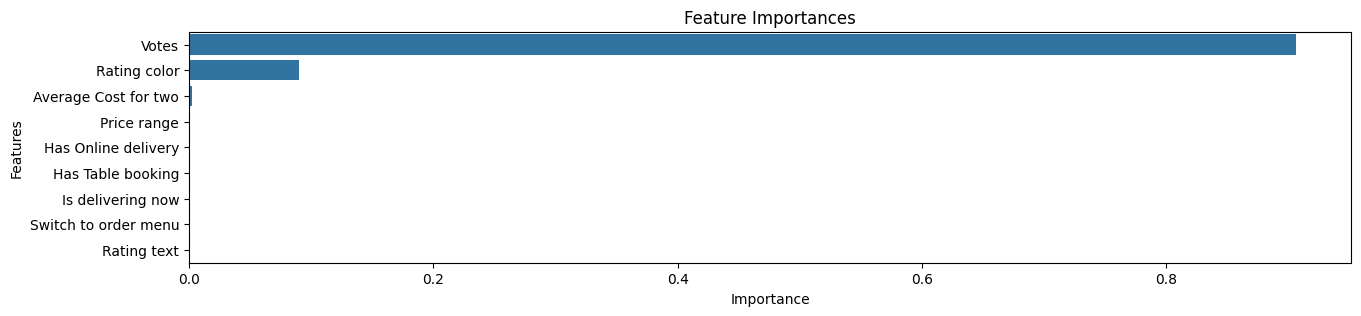

In [ ]:
# Ploting the  feature importances
plt.figure(figsize=(15, 3))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()